In [52]:
import pandas as pd 
import matplotlib.pyplot as plt

In [53]:
DATA_PATH = '../1. Data/'
WASTE_PATH = DATA_PATH+'waste.csv'

In [54]:
df = pd.read_csv('../1. Data/waste.csv', delimiter=';', decimal='.')
df['date'] = pd.to_datetime(df['date'])  # convert date column to datetime format

In [111]:
df

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
0,411.0,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21:00:00,13.906042
1,332.0,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20:00:00,11.592153
2,874.0,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21:00:00,26.351053
3,508.0,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual_1,2021-07-02 21:00:00,23.008216
4,345.0,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11:00:00,18.286006
...,...,...,...,...,...,...,...,...,...
53329,67.0,"Sauces, Jams & Condiments",Prepared-Edible Exc.,Barcelona,B,Ingredient,manual_1,2021-08-21 20:00:00,31.691923
53330,604.0,Meat,Inventory Spoilage,Madrid,C,Article,manual_1,2022-08-12 15:00:00,12.820998
53331,179.0,Snacks,Prepared-Edible Exc.,Madrid,A,Ingredient,manual_1,2021-11-14 22:00:00,21.526217
53332,45.0,"Sauces, Jams & Condiments",Prepared-Edible Exc.,Madrid,A,Ingredient,manual_1,2022-03-03 22:00:00,10.216555


In [56]:
df.describe()

,item,waste
count,53334.000000,53334.000000
mean,519.890951,23.224077
std,324.852274,15.996438
min,0.000000,2.092367
25%,258.000000,12.820998
50%,498.000000,19.413342
75%,804.000000,29.383295
max,1159.000000,223.616587


In [57]:
# show timespan of data
df['date'].min(), df['date'].max()

(Timestamp('2021-02-02 08:00:00'), Timestamp('2022-12-31 18:00:00'))

## By kitchen analysis

In [58]:
# create 3 dataframes, one for each kitchen A,B,C
df_A = df[df['kitchen_type'] == 'A']
df_B = df[df['kitchen_type'] == 'B']
df_C = df[df['kitchen_type'] == 'C']

# print timespan of data for each kitchen
print('Kitchen A: ', df_A['date'].min(), df_A['date'].max())
print('Kitchen B: ', df_B['date'].min(), df_B['date'].max())
print('Kitchen C: ', df_C['date'].min(), df_C['date'].max())

Kitchen A:  2021-03-12 21:00:00 2022-12-31 18:00:00
Kitchen B:  2021-02-02 08:00:00 2022-12-31 18:00:00
Kitchen C:  2021-03-03 19:00:00 2022-12-31 18:00:00


In [59]:
# function to obtain the 10 most wastefull items
def get_top10(df):
    top10 = df.groupby('item').sum().sort_values('waste', ascending=False).head(10)
    top10['food_category'] = top10.index.map(lambda x: df[df['item'] == x]['food_category'].values[0])
    top10['article_or_ingredient'] = top10.index.map(lambda x: df[df['item'] == x]['article_or_ingredient'].values[0])
    return top10


In [60]:
get_top10(df_A)

,waste,food_category,article_or_ingredient
item,,,
1085.0,19090.015448,Snacks,Article
389.0,13373.479197,Snacks,Article
235.0,10671.005843,Snacks,Ingredient
411.0,9804.335830,Snacks,Article
145.0,6523.122800,Snacks,Ingredient
823.0,5794.868256,"Sauces, Jams & Condiments",Ingredient
438.0,5066.978336,Snacks,Article
740.0,5017.504569,"Sauces, Jams & Condiments",Ingredient
368.0,4524.565812,Snacks,Ingredient


In [61]:
get_top10(df_B)

,waste,food_category,article_or_ingredient
item,,,
549.0,36861.627472,Breakfast,Article
62.0,24872.644659,Bread,Ingredient
299.0,23169.150168,Bread,Ingredient
874.0,22692.950075,"Potato, Grains & Pasta",Ingredient
411.0,21959.747911,Extra toppings,Article
551.0,21806.358453,Desserts & Pastries,Article
144.0,17074.114036,Meat,Ingredient
261.0,16564.738268,Vegetarian,Ingredient
157.0,15188.123407,Desserts & Pastries,Ingredient


In [62]:
get_top10(df_C)

,waste,food_category,article_or_ingredient
item,,,
1072.0,25030.709754,Desserts & Pastries,Article
963.0,7883.209413,Snacks,Article
999.0,7548.297482,Desserts & Pastries,Article
235.0,5371.873767,Meat,Ingredient
960.0,5272.738078,Desserts & Pastries,Article
1047.0,5121.912894,Snacks,Article
800.0,3181.241015,Bread,Ingredient
945.0,3036.119724,Desserts & Pastries,Article
1137.0,2527.014119,Snacks,Article


In [63]:
# calculate total waste for each kitchen
total_waste_A = df_A['waste'].sum()
total_waste_B = df_B['waste'].sum()
total_waste_C = df_C['waste'].sum()

total_waste_B

963328.3440162924

Text(0.5, 1.0, 'Kitchen C')

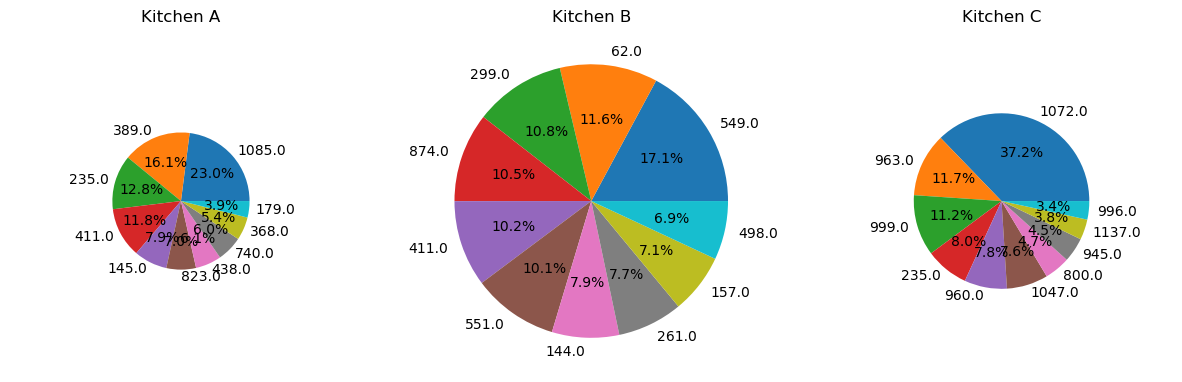

In [65]:
# build pie chart for top 10 items for each kitchen
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].pie(get_top10(df_A)['waste'], labels=get_top10(df_A).index, autopct='%1.1f%%', radius=4*total_waste_A/963328)
ax[0].set_title('Kitchen A')
ax[1].pie(get_top10(df_B)['waste'], labels=get_top10(df_B).index, autopct='%1.1f%%', radius=total_waste_B/963328)
ax[1].set_title('Kitchen B')
ax[2].pie(get_top10(df_C)['waste'], labels=get_top10(df_C).index, autopct='%1.1f%%', radius=4*total_waste_C/963328)
ax[2].set_title('Kitchen C')

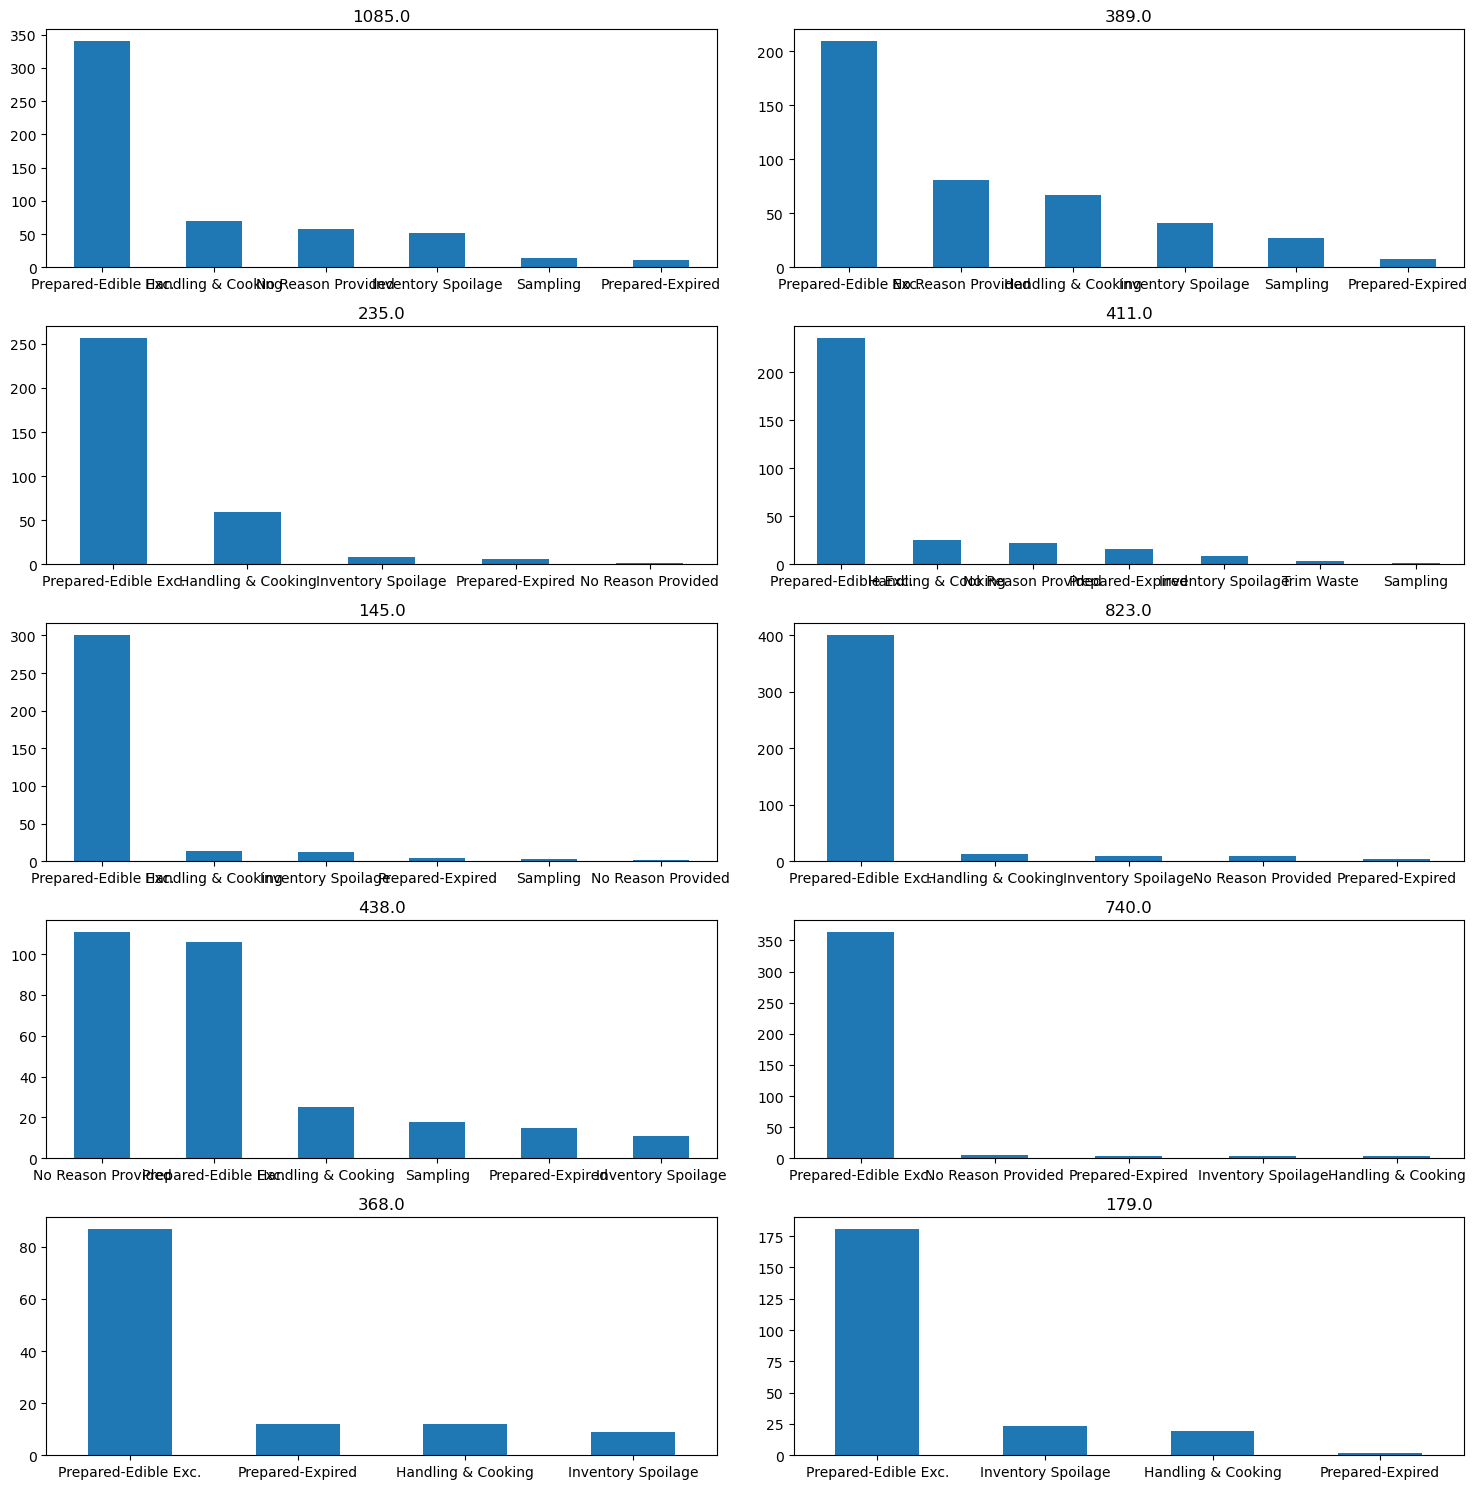

In [104]:
# get top 10 items in Kitchen B
top10_items_A = get_top10(df_A).index

# create subplots
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
plt.title('Top 10 wastefull items in Kitchen B')

# loop through top 10 items and plot reason distribution in each subplot
for i, item in enumerate(top10_items_A):
    row = i // 2
    col = i % 2
    df_A[df_A['item'] == item]['reason'].value_counts().plot(kind='bar', ax=ax[row][col],
                                                             title=item, rot=0)

plt.tight_layout()

## Analyze the reason why top 10 elements of kitchen B are generating waste 

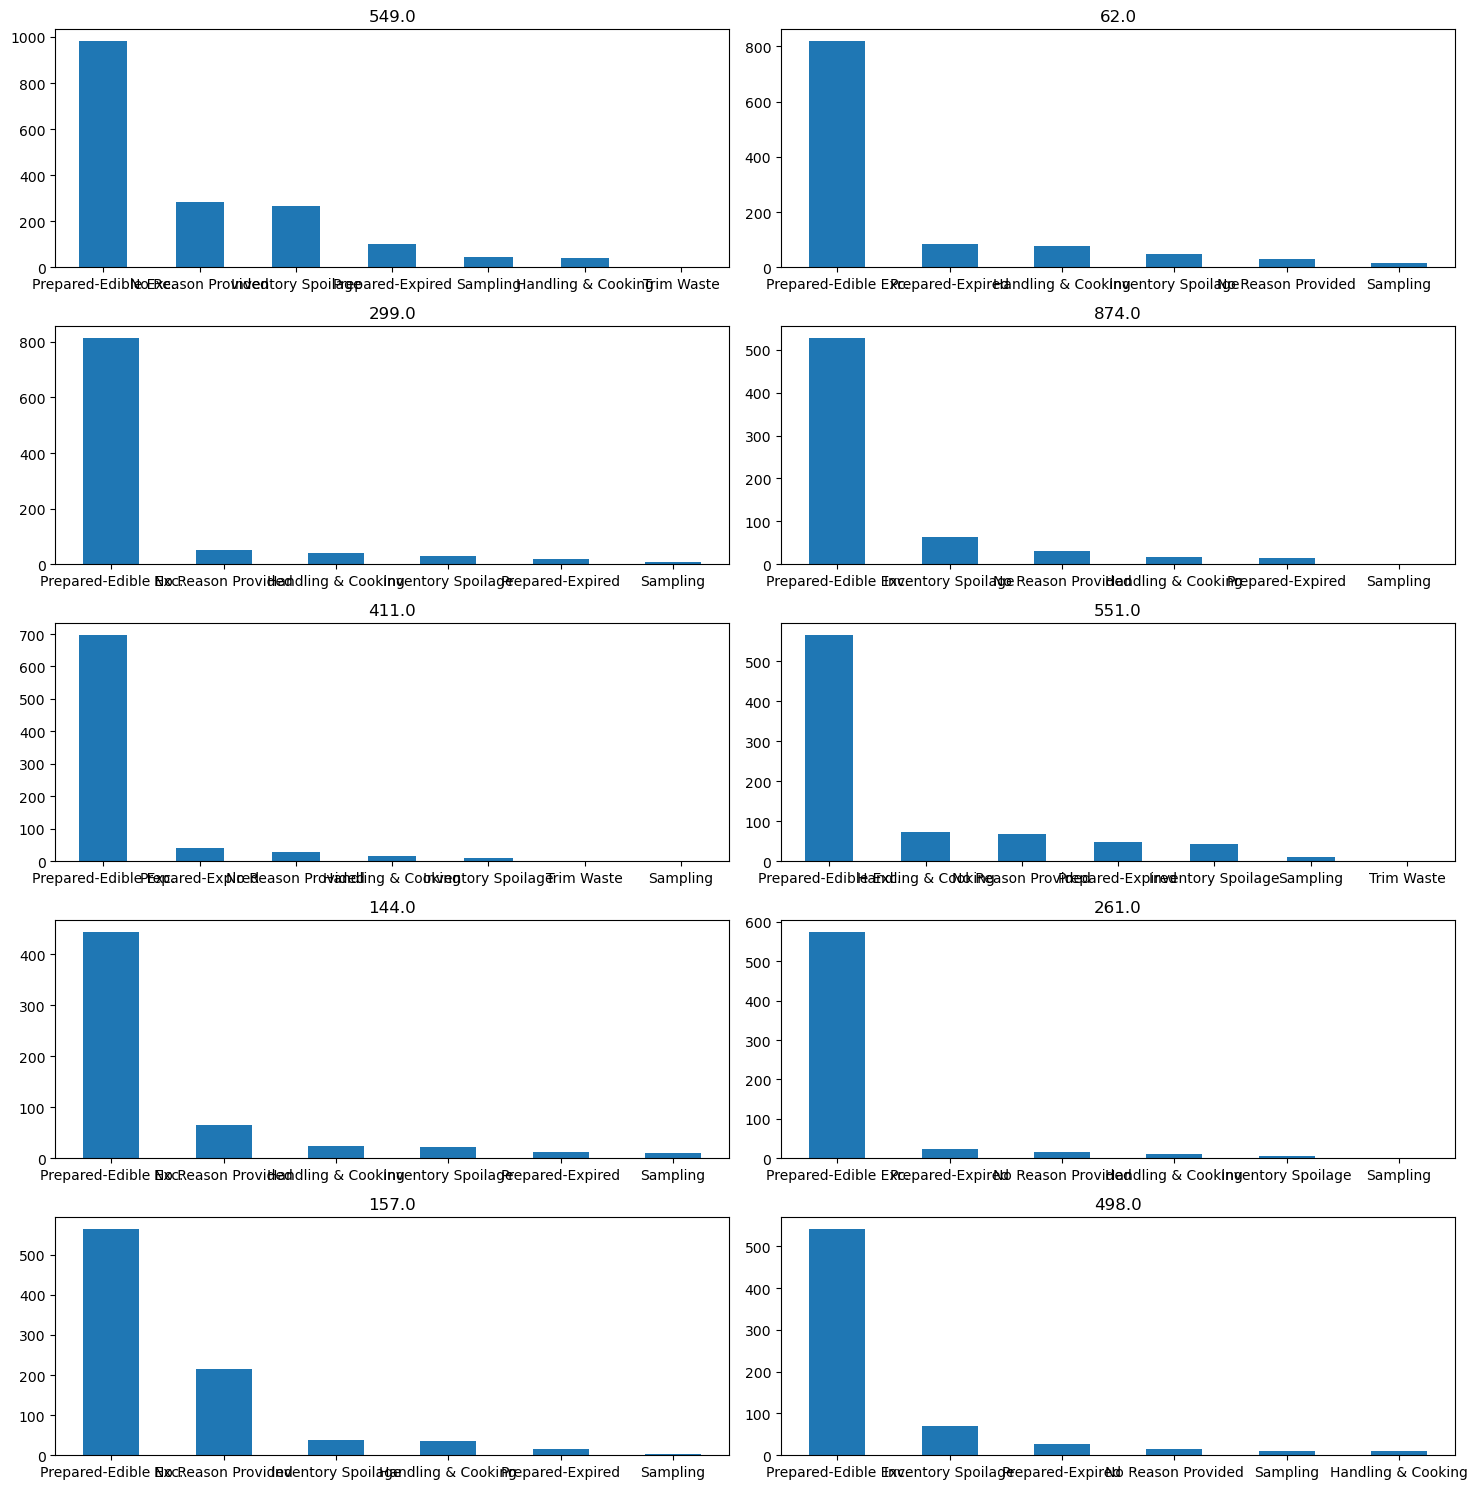

In [70]:
# get top 10 items in Kitchen B
top10_items_B = get_top10(df_B).index

# create subplots
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
plt.title('Top 10 wastefull items in Kitchen B')

# loop through top 10 items and plot reason distribution in each subplot
for i, item in enumerate(top10_items_B):
    row = i // 2
    col = i % 2
    df_B[df_B['item'] == item]['reason'].value_counts().plot(kind='bar', ax=ax[row][col],
                                                             title=item, rot=0)

plt.tight_layout()

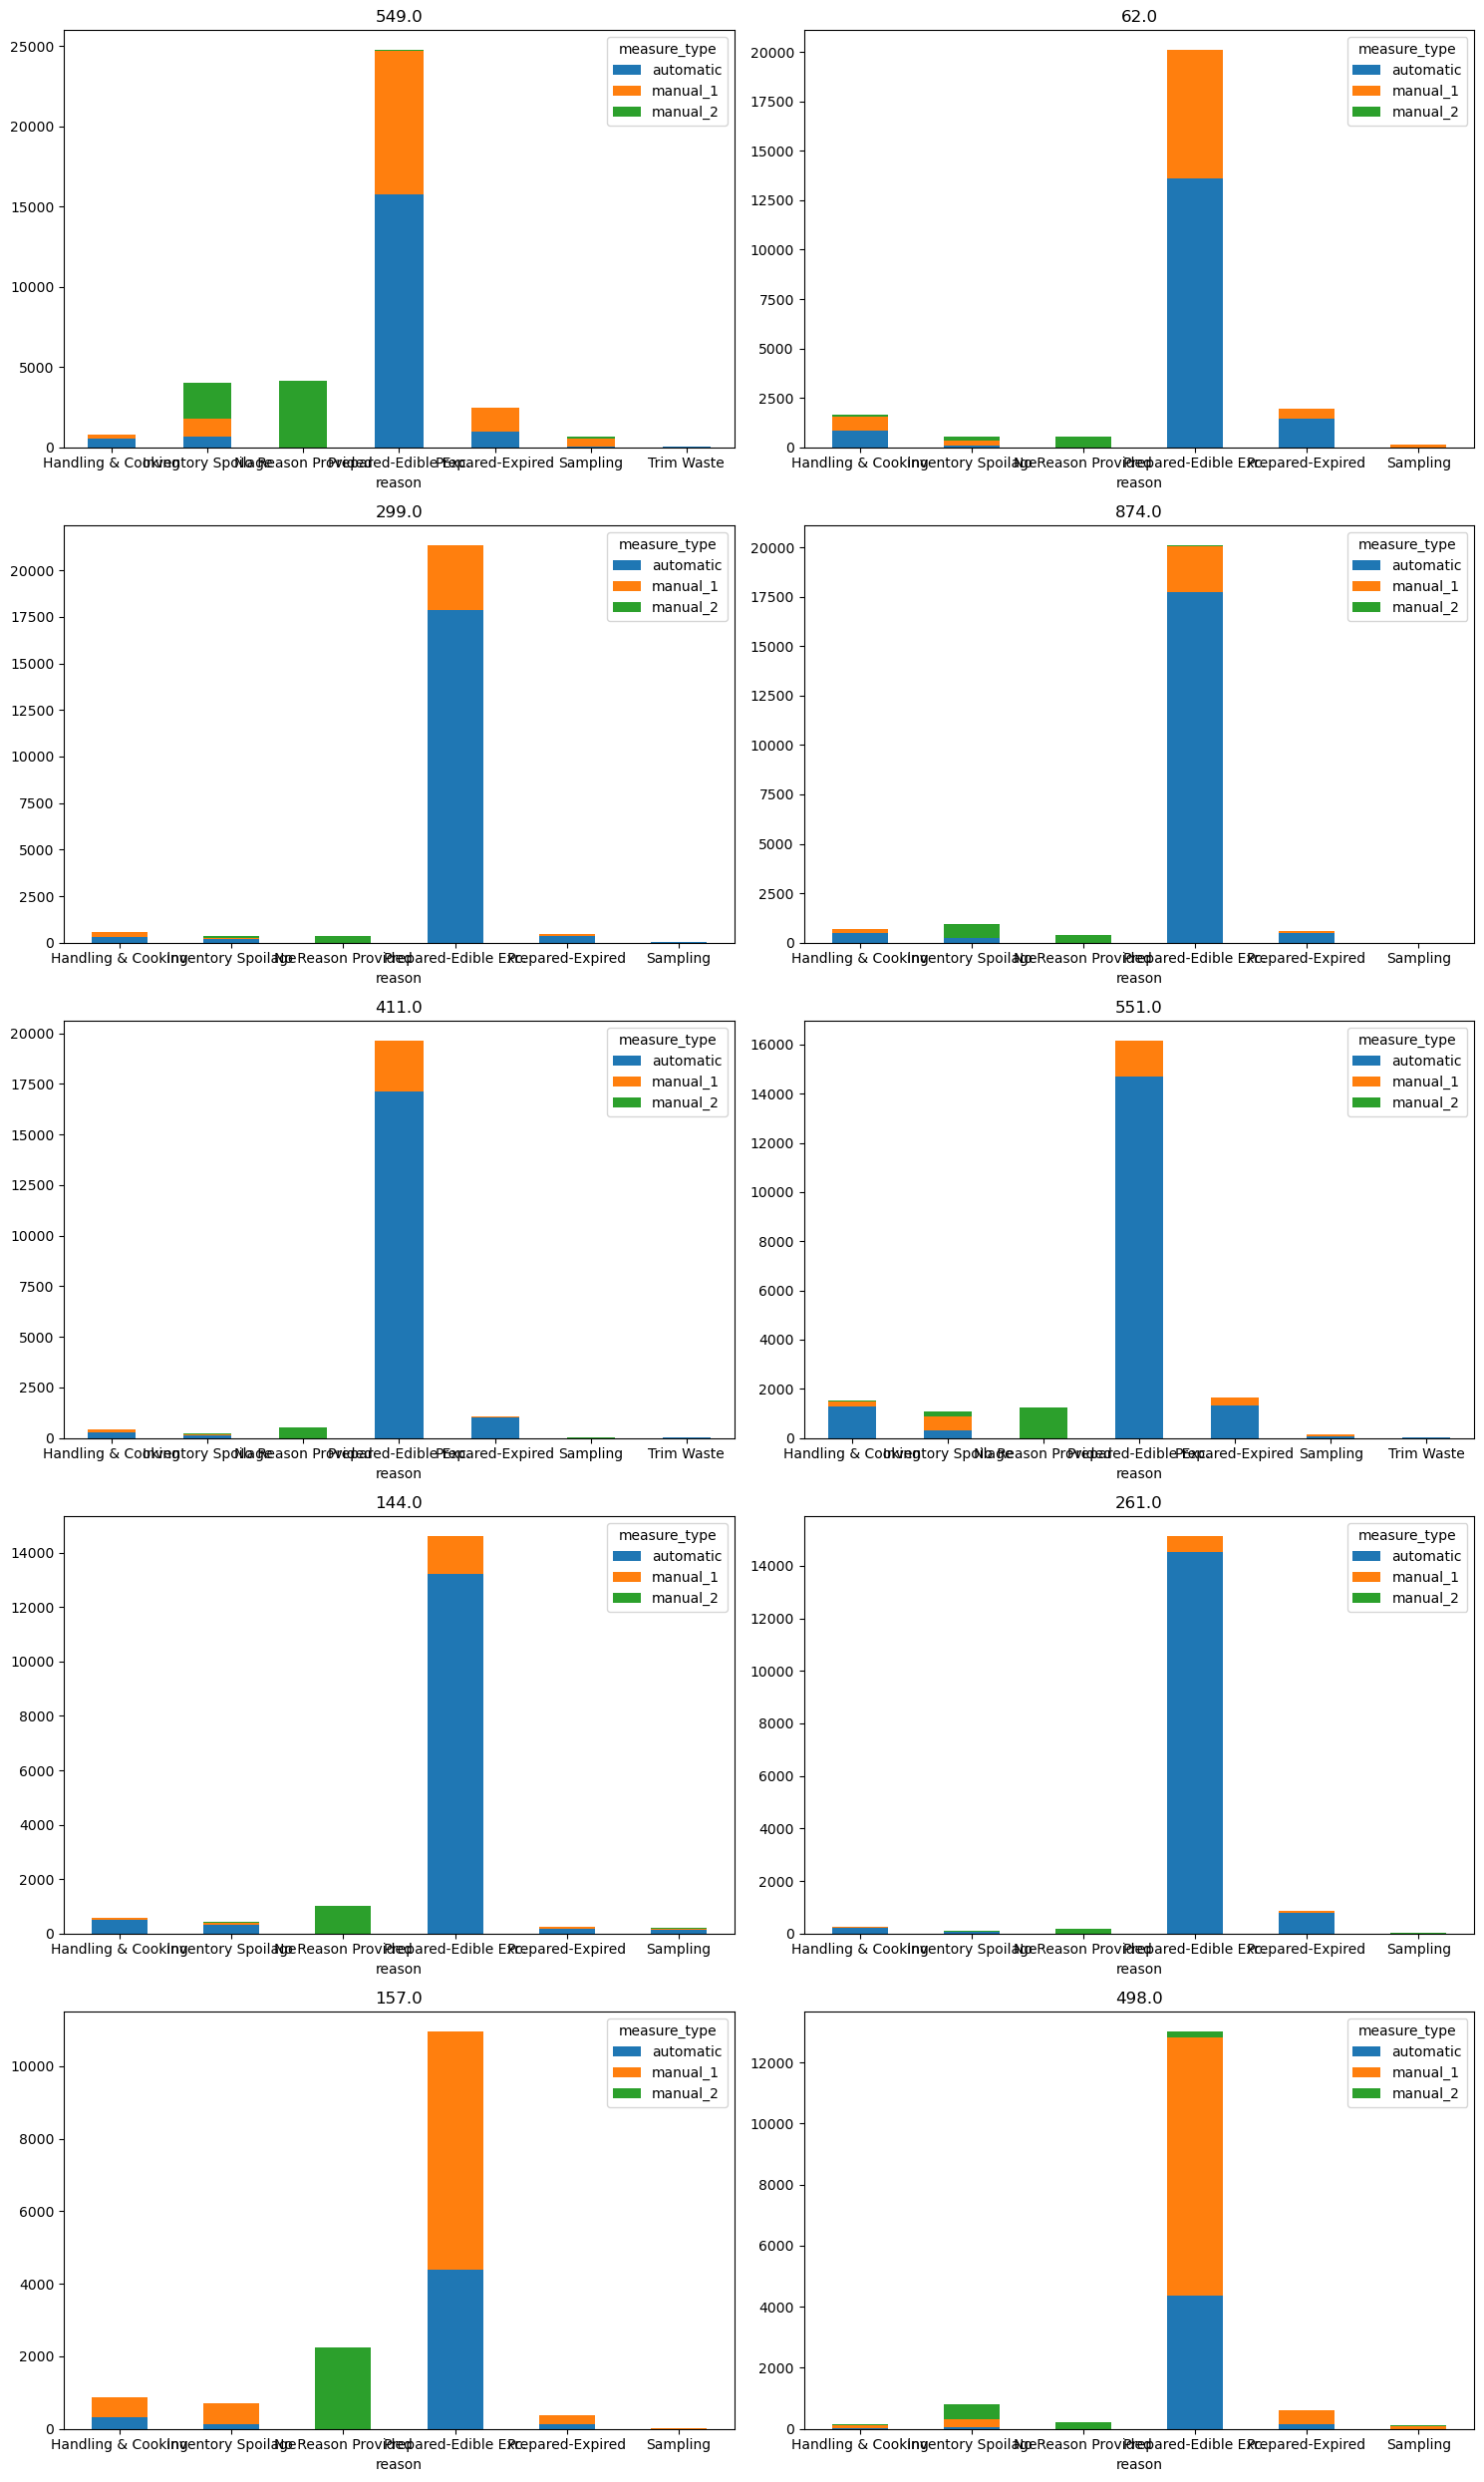

In [76]:
fig, ax = plt.subplots(5, 2, figsize=(15, 25))
for i, item in enumerate(top10_items_B):
    row = i // 2
    col = i % 2
    df_reason = df_B[df_B['item'] == item].groupby(['reason', 'measure_type'])['waste'].sum().unstack()
    df_reason.plot(kind='bar', stacked=True, ax=ax[row][col], rot=0)
    ax[row][col].set_title(item)

plt.tight_layout()

measure_type
automatic    AxesSubplot(0.125,0.11;0.775x0.77)
manual_1     AxesSubplot(0.125,0.11;0.775x0.77)
manual_2     AxesSubplot(0.125,0.11;0.775x0.77)
Name: waste, dtype: object

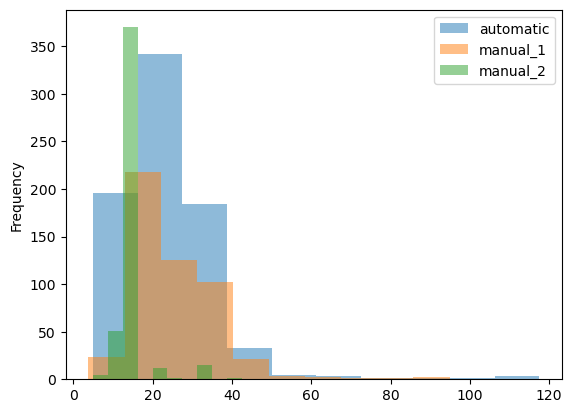

In [83]:
# distribution of item 549 in Kitchen B on automatic vs manual_1
df_B[df_B['item'] == 549].groupby(['measure_type'])['waste'].plot(kind='hist', alpha=0.5, legend=True)

In [102]:
# filter dataframe
subset = df[(df['kitchen_type'] == 'B') & (df['item'].isin(get_top10(df_B).index))& (df['reason'] == 'Prepared-Edible Exc.')]

# calculate fraction of total waste produced by kitchen B
total_waste = df['waste'].sum()
fraction = subset['waste'].sum() / total_waste

print('Fraction of total waste produced by top 10 elements of kitchen B discarded edible: ', fraction)

Fraction of total waste produced by top 10 elements of kitchen B discarded edible:  0.1418635890645012


In [109]:
# filter dataframe
subset = df[(df['kitchen_type'] == 'C') & (df['item'].isin([1072]))]

# calculate fraction of total waste produced by kitchen B
total_waste = df['waste'].sum()
fraction = subset['waste'].sum() / total_waste

print('Fraction of total waste produced by top 1 element of kitchen C discarded edible: ', fraction)

Fraction of total waste produced by top 1 element of kitchen C discarded edible:  0.02020833537626932


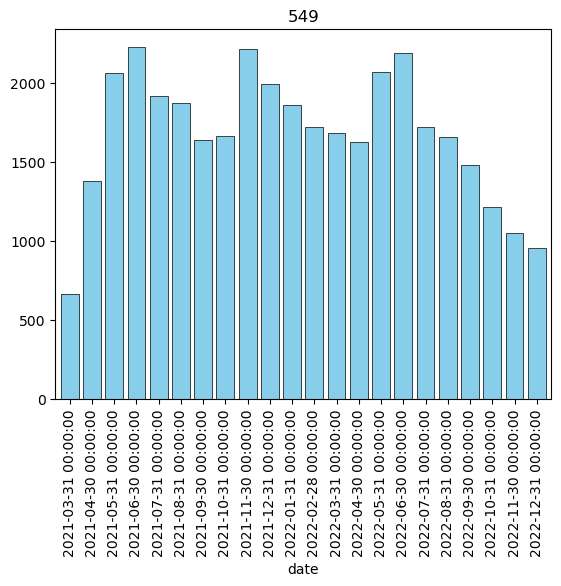

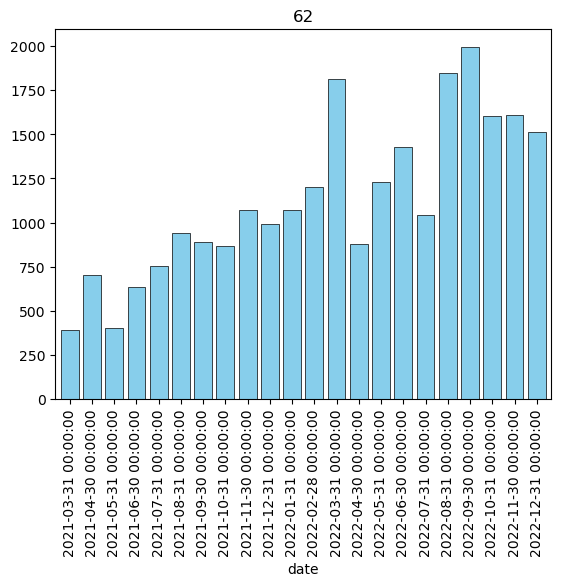

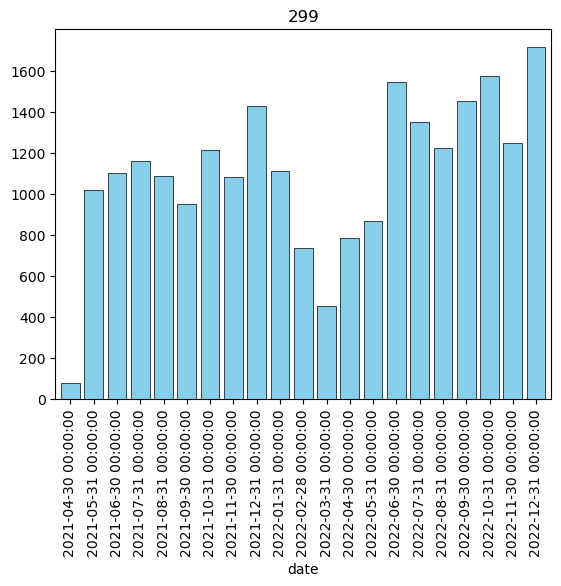

In [75]:
#filter by food_category
df_B[df_B['reason'] == 'Prepared-Edible Exc.']

top3_items_B = [549, 62, 299]

for item in top3_items_B:
    df_B[df_B['item'] == item].groupby(pd.Grouper(key='date', freq='M'))['waste'].sum().plot(
        title=item, kind='bar', width=0.8, edgecolor='black', linewidth=0.5, color='skyblue')
    plt.show()
    

    